In [1]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
#import cv2
import torch.optim as  optim 
if torch.cuda.is_available():  
  dev = "cuda:0" 
  print("gpu up")
else:  
  dev = "cpu"  
  print(dev)
device = torch.device(dev)

gpu up


In [3]:
df = pd.read_csv("D:/Data Science course works/Destation/Celeb_A_DATA/list_attr_celeba.csv")
def haircolor(x):
    if x["Blond_Hair"] == 1:
        return 0
    elif x["Brown_Hair"] == 1:
        return 1
    elif x["Black_Hair"] == 1:
        return 2
    else :
        return 3
    
df["Hair_Color"] = df.apply(haircolor,axis=1)

In [4]:
df = df[["image_id","Hair_Color",'Pale_Skin',"Male","No_Beard"]]
df=df.iloc[:20000]
df.Pale_Skin = df.Pale_Skin.apply(lambda x: max(x,0)) 
df.Male = df.Male.apply(lambda x: max(x,0))
df.No_Beard = df.No_Beard.apply(lambda x: max(x,0))
df.head()

,image_id,Hair_Color,Pale_Skin,Male,No_Beard
0,000001.jpg,1,0,0,1
1,000002.jpg,1,0,0,1
2,000003.jpg,3,0,1,1
3,000004.jpg,3,0,0,1
4,000005.jpg,3,0,0,1


In [5]:
faces=[]
a=0
c=0
faces =[]
for i in df.iloc[:20000].image_id:
    pic = Image.open("D:/Data Science course works/Destation/Celeb_A_DATA/img_align_celeba/img_align_celeba/"+i)
    pic = pic.resize((64,64))
    pix = np.array(pic.getdata()).reshape(pic.size[0], pic.size[1], 3)
    pix = pix/255
    """
    for the images I had to use np.moveaxis to change the shape from  (64,64,3) to (3,64,64)
    without messing up the image 
    
    """
    faces.append(np.moveaxis(pix,-1,0).tolist())
    c+=1
    k=round((100*c/20000),2)
    if k!=a:
        a=k
        print(k)
    
faces = np.array(faces)


.11
66.12
66.13
66.14
66.15
66.16
66.17
66.18
66.19
66.2
66.21
66.22
66.23
66.24
66.25
66.26
66.27
66.28
66.29
66.3
66.31
66.32
66.33
66.34
66.35
66.36
66.37
66.38
66.39
66.4
66.41
66.42
66.43
66.44
66.45
66.46
66.47
66.48
66.49
66.5
66.51
66.52
66.53
66.54
66.55
66.56
66.57
66.58
66.59
66.6
66.61
66.62
66.63
66.64
66.65
66.66
66.67
66.68
66.69
66.7
66.71
66.72
66.73
66.74
66.75
66.76
66.77
66.78
66.79
66.8
66.81
66.82
66.83
66.84
66.85
66.86
66.87
66.88
66.89
66.9
66.91
66.92
66.93
66.94
66.95
66.96
66.97
66.98
66.99
67.0
67.01
67.02
67.03
67.04
67.05
67.06
67.07
67.08
67.09
67.1
67.11
67.12
67.13
67.14
67.15
67.16
67.17
67.18
67.19
67.2
67.21
67.22
67.23
67.24
67.25
67.26
67.27
67.28
67.29
67.3
67.31
67.32
67.33
67.34
67.35
67.36
67.37
67.38
67.39
67.4
67.41
67.42
67.43
67.44
67.45
67.46
67.47
67.48
67.49
67.5
67.51
67.52
67.53
67.54
67.55
67.56
67.57
67.58
67.59
67.6
67.61
67.62
67.63
67.64
67.65
67.66
67.67
67.68
67.69
67.7
67.71
67.72
67.73
67.74
67.75
67.76
67.77
67.78
67.79
67.8

In [ ]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        # channels_in ,  channels_out, kernel_size, stride , padding,
        self.conv1 = nn.Conv2d(3,64,3,1,1)
        self.conv2 = nn.Conv2d(64,64,3,1,1)
        self.conv3 = nn.Conv2d(64,64,4,2,1)
        self.conv4 = nn.Conv2d(64,128,4,2,1)
        self.maxp1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.maxp2 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.maxp3 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.maxp4 = nn.MaxPool2d(kernel_size=2,stride=2)


        
    def forward(self,x):
        out = self.conv1(x)
        out = self.maxp1(out)
        out = F.relu(out) 
        out = self.conv2(out)
        out = self.maxp2(out)
        out = F.relu(out)
        out = self.conv3(out)
        out = self.maxp3(out)
        out = F.relu(out)
        out= self.conv4(out)
        out = self.maxp4(out)
        out = F.relu(out)
        return out.view(out.shape[0],-1)
    
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        # channels_in ,  channels_out, kernel_size, stride , padding,
        """
        convtranspose  is different from the regular conv layer (looking at the equations of two of them )
        this link shows examples about it 
        https://towardsdatascience.com/is-the-transposed-convolution-layer-and-convolution-layer-the-same-thing-8655b751c3a1
        
        """
        self.transconv1 = nn.ConvTranspose2d(64+ 40,64,8,4,2)
        self.transconv2 = nn.ConvTranspose2d(64,64,8,4,2)
        self.transconv3 = nn.ConvTranspose2d(64,64,4,2,1)
        self.transconv4 = nn.ConvTranspose2d(64,3,4,2,1)
        
        """
        I think Embeddings layers were pretty good  so every state was converted into a vector like 
        Beard or no beard -> vector of 10 weights
        Male or Female -> vector  of 10 weights 
        
        """
        self.hairEmbedding = nn.Embedding(4,10)
        self.beardEmbedding = nn.Embedding(2,10)
        self.genderEmbedding = nn.Embedding(2,10)
        self.paleSkinEmbedding = nn.Embedding(2,10)

        
    def forward(self,x):
        z = x[:,:64]
        hair = self.hairEmbedding(x[:,64].long())
        paleSkin = self.paleSkinEmbedding(x[:,65].long())
        gender = self.genderEmbedding(x[:,66].long())
        beard = self.beardEmbedding(x[:,67].long())
        """
        Concating the embeddings and the encoded image
        """
        z = torch.cat([z,hair,beard,gender,paleSkin],dim=1)
        
        out= self.transconv1(z.view(z.shape[0],z.shape[1],1,1))
        out = F.relu(out)
        out= self.transconv2(out)
        out = F.relu(out)

        out= self.transconv3(out)
        out = F.relu(out)

        out= self.transconv4(out)
        out = F.relu(out)

        return out
        
class CVAE(nn.Module):
    def __init__(self,encoder,decoder):
        super(CVAE,self).__init__()
        self.encoder = encoder()
        self.decoder = decoder()
    def forward(self,x,attrs):
        h = self.encoder(x)
        
        mu = h[:,:64]
        logvar = h[:,64:]
        # this part is for the reparameterization trick
        s= torch.exp(logvar)
        eps = torch.randn_like(s)
        z = s*eps + mu 
        
        z= torch.cat([z,attrs],dim=1)
        out = self.decoder(z)
        return out,mu,logvar
        
vae = CVAE(Encoder,Decoder)
vae.to(device)

In [6]:
def ceil(a,b):
    return -(-a//b)

In [7]:
def save_img_epoch(x,epoch):
    attrs = torch.Tensor(x)
    h = torch.cat((torch.randn(1,64),attrs),dim=1).to(device)
    img = vae.decoder(h)
    img = img.cpu().detach().numpy().reshape(3,64,64)
    img = np.moveaxis(img,0,-1)
    y=str(x[0][0])+"_"+str(x[0][1])+"_"+str(x[0][2])+"_"+str(x[0][3])+"_"+str(epoch)+".png"
    plt.imshow(img)
    plt.savefig(y)

In [8]:
def loss_function(recon_x,x,mu,logvar):
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    KLD /= x.shape[0] * 3 * 64 * 64
    recon_loss = F.mse_loss(recon_x,x)
    return recon_loss +  KLD


In [ ]:

epochs = 101

batch_size= 256
optimizer = optim.Adagrad(vae.parameters(),lr = 0.001)

npData = df.iloc[:20000].to_numpy()


n_samples = len(npData)
better_batch_size = ceil(n_samples, ceil(n_samples, batch_size))
losstrack = []
for e in range(epochs):
    print(e)
    losses = []
    for i in range(ceil(n_samples, better_batch_size)):
        batch = npData[i * better_batch_size: (i+1) * better_batch_size]
        attrs = torch.Tensor(batch[:,1:].astype('float16')).to(device)
#         break
        imgs = faces[i * better_batch_size: (i+1) * better_batch_size]
        imgs = torch.Tensor(imgs.astype('float16')).to(device)
        vae.zero_grad()
        recon_imgs,mu,logvar = vae(imgs,attrs)
        err = loss_function(recon_imgs,imgs,mu,logvar)
        err.backward()
        optimizer.step()
        losses.append(err.item())
    losstrack.append(np.mean(losses))
    if e % 10 == 0: 
        torch.save(vae.state_dict(), "./vae.pt")
        print(np.mean(losses), "mean loss", e)
        save_img_epoch([[2,0,0,1]],e)
        save_img_epoch([[2,0,1,0]],e)
        save_img_epoch([[2,0,0,1]],e)
        save_img_epoch([[1,0,0,1]],e)
        save_img_epoch([[0,0,0,1]],e)
        save_img_epoch([[2,1,0,1]],e)
        save_img_epoch([[2,0,1,0]],e)
        save_img_epoch([[2,0,1,1]],e)

0
0.053433270158269736 mean loss 0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
0.046902112615636635 mean loss 100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
0.04666406288743019 mean loss 200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251


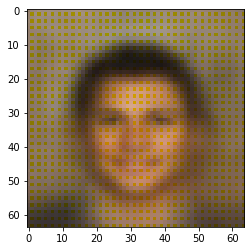

In [18]:
def loss_function(recon_x,x,mu,logvar):
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    KLD /= x.shape[0] * 3 * 64 * 64
    recon_loss = F.mse_loss(recon_x,x)
    return recon_loss +  KLD

epochs = 1201

batch_size= 256
optimizer = optim.Adagrad(vae.parameters(),lr = 0.001)

npData = df.iloc[:20000].to_numpy()


n_samples = len(npData)
better_batch_size = ceil(n_samples, ceil(n_samples, batch_size))
losstrack = []
for e in range(epochs):
    print(e)
    losses = []
    for i in range(ceil(n_samples, better_batch_size)):
        batch = npData[i * better_batch_size: (i+1) * better_batch_size]
        attrs = torch.Tensor(batch[:,1:].astype('float16')).to(device)
#         break
        imgs = faces[i * better_batch_size: (i+1) * better_batch_size]
        imgs = torch.Tensor(imgs.astype('float16')).to(device)
        vae.zero_grad()
        recon_imgs,mu,logvar = vae(imgs,attrs)
        err = loss_function(recon_imgs,imgs,mu,logvar)
        err.backward()
        optimizer.step()
        losses.append(err.item())
    losstrack.append(np.mean(losses))
    if e % 100 == 0: 
        torch.save(vae.state_dict(), "./vae.pt")
        print(np.mean(losses), "mean loss", e)
        save_img_epoch([[2,0,0,1]],e)
        save_img_epoch([[2,0,1,0]],e)
        save_img_epoch([[2,0,0,1]],e)
        save_img_epoch([[1,0,0,1]],e)
        save_img_epoch([[0,0,0,1]],e)
        save_img_epoch([[2,1,0,1]],e)
        save_img_epoch([[2,0,1,0]],e)
        save_img_epoch([[2,0,1,1]],e)

In [19]:
checkpoint = torch.load("D:/Data Science course works/Destation/vae.pt")
vae.load_state_dict(checkpoint)

<All keys matched successfully>

In [9]:
def showImage(x):
    attrs = torch.Tensor(x)
    h = torch.cat((torch.randn(1,64),attrs),dim=1).to(device)
    img = vae.decoder(h)
    img = img.cpu().detach().numpy().reshape(3,64,64)
    img = np.moveaxis(img,0,-1)
    return img

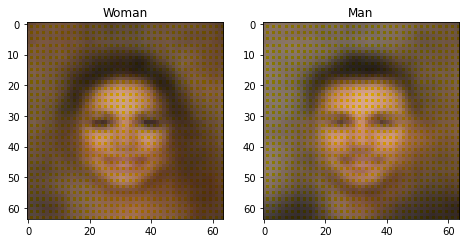

In [21]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(showImage([[2,0,0,1]]))
axarr[0].set_title("Woman")
axarr[1].imshow(showImage([[2,0,1,0]]))
axarr[1].set_title("Man")

f.subplots_adjust(hspace=0.3,left=2,right=3)

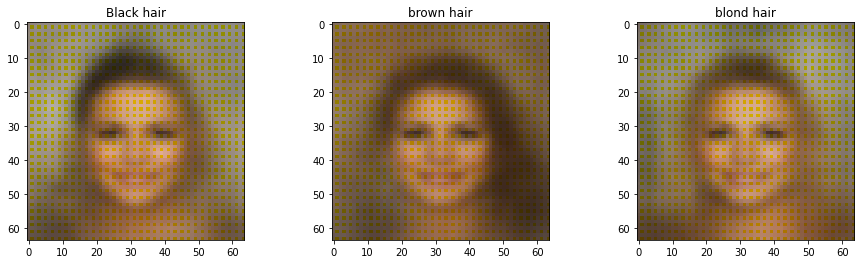

In [22]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(showImage([[2,0,0,1]]))
axarr[0].set_title("Black hair")
axarr[1].imshow(showImage([[1,0,0,1]]))
axarr[1].set_title("brown hair")
axarr[2].imshow(showImage([[0,0,0,1]]))
axarr[2].set_title("blond hair")


f.subplots_adjust(hspace=0.3,left=2,right=4)

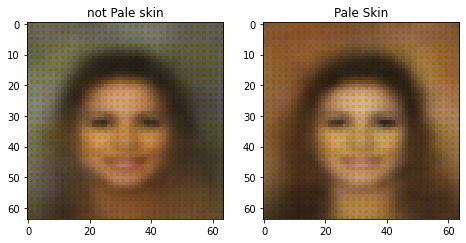

In [23]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(showImage([[2,0,0,1]]))
axarr[0].set_title("not Pale skin")
axarr[1].imshow(showImage([[2,1,0,1]]))
axarr[1].set_title("Pale Skin")

f.subplots_adjust(hspace=0.3,left=2,right=3)

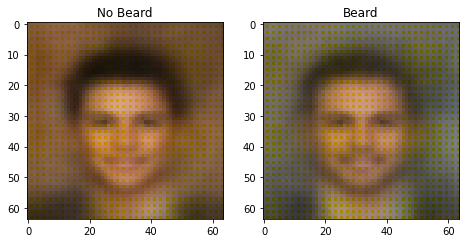

In [24]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(showImage([[2,0,1,1]]))
axarr[0].set_title("No Beard")
axarr[1].imshow(showImage([[2,0,1,0]]))
axarr[1].set_title("Beard")

f.subplots_adjust(hspace=0.3,left=2,right=3)

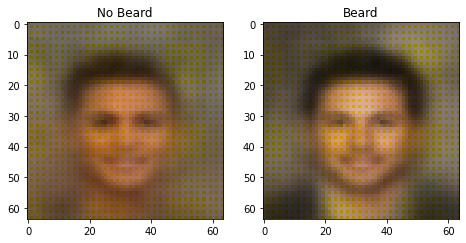

In [25]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(showImage([[2,0,1,1]]))
axarr[0].set_title("No Beard")
axarr[1].imshow(showImage([[2,0,1,0]]))
axarr[1].set_title("Beard")

f.subplots_adjust(hspace=0.3,left=2,right=3)

In [10]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        # channels_in ,  channels_out, kernel_size, stride , padding,
        self.conv1 = nn.Conv2d(3,64,3,1,1)
        self.conv2 = nn.Conv2d(64,64,3,1,1)
        self.conv3 = nn.Conv2d(64,64,4,2,1)
        self.conv4 = nn.Conv2d(64,128,4,2,1)
        
    def forward(self,x):
        out = self.conv1(x)
        out = F.relu(out) 
        out = self.conv2(out)
        out = F.relu(out)
        out = self.conv3(out)
        out = F.relu(out)
        out= self.conv4(out)
        out = F.relu(out)
        return out.view(out.shape[0],-1)
    
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        # channels_in ,  channels_out, kernel_size, stride , padding,
        """
        convtranspose  is different from the regular conv layer (looking at the equations of two of them )
        this link shows examples about it 
        https://towardsdatascience.com/is-the-transposed-convolution-layer-and-convolution-layer-the-same-thing-8655b751c3a1
        
        """
        self.transconv1 = nn.ConvTranspose2d(64+ 40,64,8,4,2)
        self.transconv2 = nn.ConvTranspose2d(64,64,8,4,2)
        self.transconv3 = nn.ConvTranspose2d(64,64,4,2,1)
        self.transconv4 = nn.ConvTranspose2d(64,3,4,2,1)
        
        """
        I think Embeddings layers were pretty good  so every state was converted into a vector like 
        Beard or no beard -> vector of 10 weights
        Male or Female -> vector  of 10 weights 
        
        """
        self.hairEmbedding = nn.Embedding(4,10)
        self.beardEmbedding = nn.Embedding(2,10)
        self.genderEmbedding = nn.Embedding(2,10)
        self.paleSkinEmbedding = nn.Embedding(2,10)

        
    def forward(self,x):
        z = x[:,:64]
        hair = self.hairEmbedding(x[:,64].long())
        paleSkin = self.paleSkinEmbedding(x[:,65].long())
        gender = self.genderEmbedding(x[:,66].long())
        beard = self.beardEmbedding(x[:,67].long())
        """
        Concating the embeddings and the encoded image
        """
        z = torch.cat([z,hair,beard,gender,paleSkin],dim=1)
        
        out= self.transconv1(z.view(z.shape[0],z.shape[1],1,1))
        out = F.relu(out)
        out= self.transconv2(out)
        out = F.relu(out)

        out= self.transconv3(out)
        out = F.relu(out)

        out= self.transconv4(out)
        out = F.relu(out)

        return out
        
class CVAE(nn.Module):
    def __init__(self,encoder,decoder):
        super(CVAE,self).__init__()
        self.encoder = encoder()
        self.decoder = decoder()
    def forward(self,x,attrs):
        h = self.encoder(x)
        print(h.shape)
        mu = h[:,:64]
        logvar = h[:,64:]
        # this part is for the reparameterization trick
        s= torch.exp(logvar)
        eps = torch.randn_like(s)
        z = s*eps + mu 
        
        z= torch.cat([z,attrs],dim=1)
        out = self.decoder(z)
        return out,mu,logvar
        
vae = CVAE(Encoder,Decoder)
vae.to(device)

CVAE(
  (encoder): Encoder(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv4): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  )
  (decoder): Decoder(
    (transconv1): ConvTranspose2d(104, 64, kernel_size=(8, 8), stride=(4, 4), padding=(2, 2))
    (transconv2): ConvTranspose2d(64, 64, kernel_size=(8, 8), stride=(4, 4), padding=(2, 2))
    (transconv3): ConvTranspose2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (transconv4): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (hairEmbedding): Embedding(4, 10)
    (beardEmbedding): Embedding(2, 10)
    (genderEmbedding): Embedding(2, 10)
    (paleSkinEmbedding): Embedding(2, 10)
  )
)

In [11]:


epochs = 10

batch_size= 256
optimizer = optim.Adagrad(vae.parameters(),lr = 0.001)

npData = df.iloc[:20000].to_numpy()


n_samples = len(npData)
better_batch_size = ceil(n_samples, ceil(n_samples, batch_size))
losstrack = []
for e in range(epochs):
    print(e)
    losses = []
    for i in range(ceil(n_samples, better_batch_size)):
        batch = npData[i * better_batch_size: (i+1) * better_batch_size]
        attrs = torch.Tensor(batch[:,1:].astype('float16')).to(device)
#         break
        imgs = faces[i * better_batch_size: (i+1) * better_batch_size]
        imgs = torch.Tensor(imgs.astype('float16')).to(device)
        vae.zero_grad()
        recon_imgs,mu,logvar = vae(imgs,attrs)
        err = loss_function(recon_imgs,imgs,mu,logvar)
        err.backward()
        optimizer.step()
        losses.append(err.item())
    losstrack.append(np.mean(losses))
    if e % 3 == 0: 
        #torch.save(vae.state_dict(), "./vae.pt")
        print(np.mean(losses), "mean loss", e)
        showImage([[2,0,0,1]])
        print("******************************")

0


TypeError: 'torch.Size' object is not callable